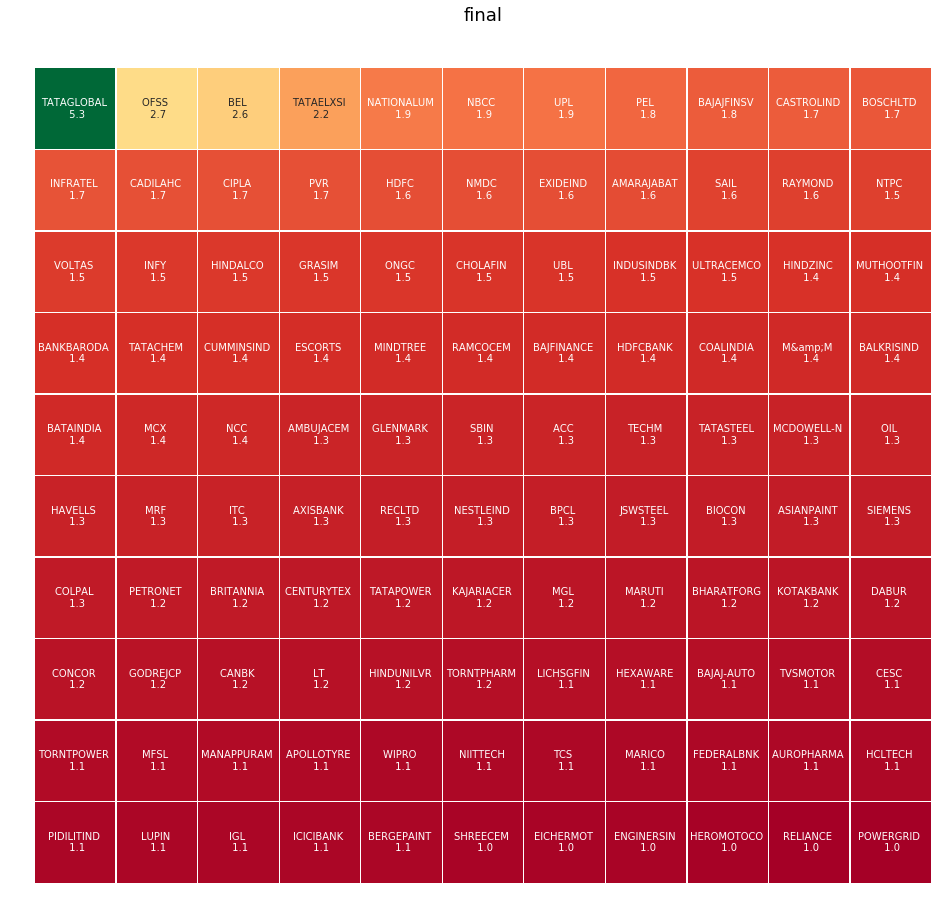

In [5]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

df=pd.read_csv('final.csv')
def xy(r):
    d=[]
    global a,b
    for i in range(1,r+1):
        if(r%i==0):
            d.append(i)
    if len(d)%2==0:
        a=d[int(len(d)/2-1)]
        b=d[int(len(d)/2)]
    df=pd.DataFrame(index=range(r),columns=['Yrows','Xcols'])
    for (k,i),x in np.ndenumerate(np.arange(r).reshape(a,b)):
        (df['Yrows'][x],df['Xcols'][x])=(k,i)
    return(df)
df=df.join(xy(len(df)))
df.drop(['Unnamed: 0','lastPrice', 'totalBuyQuantity','totalSellQuantity','Time'],axis=1,inplace=True)
symbol,Times=(np.asarray(df['symbol'])).reshape(a,b),(np.asarray(df['Times'])).reshape(a,b)
result=df.pivot(index='Yrows',columns='Xcols',values='Times')
labels=(np.asarray(["{0} \n {1:.1f}".format(symb,times) for symb,times in zip(symbol.flatten(),Times.flatten())])).reshape(a,b)

#result1=df.pivot_table(index='Yrows',columns='Xcols',values='Times',aggfunc="size")
#figsize = (result.shape[1]*2, result.shape[0]*2)
#grid_kws = {"height_ratios": (9, 5)}
#fig, ax = plt.subplots(subplot_kw=grid_kws)
fig,ax=plt.subplots(figsize=(19,15))
corr=result.corr()

#Set the font size and the distance of the title from the plot
plt.title('final',fontsize=18)
ttl=ax.title
ttl.set_position([0.5,1.05])

ax.grid(False, 'major')
ax.grid(True, 'minor')
ax.set_xticks([])
ax.set_yticks([])

#remove the axis
ax.axis('off')
#Use the heatmap function from the seaborn package

sn.heatmap(result,annot=labels,fmt="",annot_kws={"size": 10},cmap="RdYlGn",linewidth=0.30,cbar=0,square=True,ax=ax)

#display final
plt.show()

In [ ]:
import os
import subprocess
 
def execute_shell_command(cmd, work_dir):
    pipe = subprocess.Popen(cmd, shell=True, cwd=work_dir, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    (out, error) = pipe.communicate()
    print(out, error)
    pipe.wait()
def git_add(file_path, repo_dir):
    cmd = 'git add ' + file_path
    execute_shell_command(cmd, repo_dir)
def git_commit(commit_message, repo_dir):
    cmd = 'git commit -am "%s"' % commit_message
    execute_shell_command(cmd, repo_dir)

In [ ]:
from shutil import copy
copy('C://Users/mural/Task Final.ipynb','C://Users/mural/artificial7intelligence')